In [1]:
pip install selenium

  Obtaining dependency information for selenium from https://files.pythonhosted.org/packages/91/08/10cff8463b3510b78f9e3dcef6b37c542b06d71ed1240a8940ba0c75d3bc/selenium-4.26.1-py3-none-any.whl.metadata
  Obtaining dependency information for trio~=0.17 from https://files.pythonhosted.org/packages/3c/83/ec3196c360afffbc5b342ead48d1eb7393dd74fa70bca75d33905a86f211/trio-0.27.0-py3-none-any.whl.metadata
  Obtaining dependency information for trio-websocket~=0.9 from https://files.pythonhosted.org/packages/48/be/a9ae5f50cad5b6f85bd2574c2c923730098530096e170c1ce7452394d7aa/trio_websocket-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for sortedcontainers from https://files.pythonhosted.org/packages/32/46/9cb0e58b2deb7f82b84065f37f3bffeb12413f947f9388e4cac22c4621ce/sortedcontainers-2.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for outcome from https://files.pythonhosted.org/packages/55/8b/5ab7257531a5d830fc8000c476e63c935488d74609b50f9384a643ec0a62


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


SCRAPING

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
import time
from selenium.webdriver.common.by import By

from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

web = 'https://www.avito.ma/fr/maroc/voitures-%C3%A0_vendre'
path = 'C:\\Users\\HP ProBook 440 G8\\Downloads\\chromedriver-win64\\chromedriver.exe'
service = Service(executable_path=path)
driver = webdriver.Chrome(service=service)
driver.get(web)

start = time.time()
initialScroll = 0
finalScroll = 1000

while True:
    driver.execute_script(f"window.scrollTo({initialScroll},{finalScroll})")
    initialScroll = finalScroll
    finalScroll += 1000
    time.sleep(2) 
    end = time.time()
    if round(end - start) > 20:  
        break

# Attendre que les éléments spécifiques soient présents avant d'extraire les liens
try:
    WebDriverWait(driver, 10).until(
        EC.presence_of_element_located((By.XPATH, '//*[@id="__next"]/div/main/div/div[5]/div/div/div/a'))
    )
except:
    print("Les éléments n'ont pas été trouvés ou la page a changé.")

# Extraction des URLs des annonces
urls = []
elements = driver.find_elements(By.XPATH, '//*[@id="__next"]/div/main/div/div[5]/div/div/div/a')
for elem in elements:
    href = elem.get_attribute('href')
    if href:
        urls.append(href)

# Vérifiez combien de liens ont été extraits
print(f"Nombre de liens extraits : {len(urls)}")


Nombre de liens extraits : 37


In [ ]:
data = []
for url in urls:
    driver.get(url)
    time.sleep(5) 
    details = driver.find_elements(By.XPATH, "//li[contains(@class, 'sc-qmn92k-1 jJjeGO')]")
    
    annonce_info = []
    for detail in details:
        annonce_info.append(detail.text.split('\n'))
    
    data.append(annonce_info)

   
# Afficher les données extraites
for annonce in data:
    print(annonce)

[['Type', "Voitures d'occasion, à vendre"], ['Secteur', 'Saniat Rmal'], ['Kilométrage', '20 000 - 24 999'], ['Marque', 'Mercedes-Benz'], ['Modèle', 'Classe C'], ['Nombre de portes', '5'], ['Origine', 'Importée neuve'], ['Première main', 'Oui'], ['Puissance fiscale', '8 CV'], ['État', 'Excellent']]
[['Type', "Voitures d'occasion, à vendre"], ['Secteur', 'Harhoura'], ['Kilométrage', '100 000 - 109 999'], ['Marque', 'Peugeot'], ['Modèle', '208'], ['Nombre de portes', '5'], ['Origine', 'WW au Maroc'], ['Première main', 'Oui'], ['Puissance fiscale', '6 CV'], ['État', 'Excellent']]
[['Type', "Voitures d'occasion, à vendre"], ['Secteur', 'Autre secteur'], ['Kilométrage', '160 000 - 169 999'], ['Marque', 'Ford'], ['Modèle', 'Focus'], ['Nombre de portes', '5'], ['Origine', 'WW au Maroc'], ['Première main', 'Non'], ['Puissance fiscale', '6 CV'], ['État', 'Très bon']]
[['Type', "Voitures d'occasion, à vendre"], ['Secteur', 'La Base'], ['Kilométrage', '200 000 - 249 999'], ['Marque', 'Land Rover']

In [12]:
len(annonce_info)

36

In [13]:
annonce_info

'https://www.avito.ma/vi/55769340.htm'

In [21]:
# Initialisation des listes pour stocker les données
Type = [None for _ in range(len(data))]
Model = [None for _ in range(len(data))]
Marque = [None for _ in range(len(data))]
Kilometrage = [None for _ in range(len(data))]
Etat = [None for _ in range(len(data))]
Puissance_fiscale = [None for _ in range(len(data))]
Premiere_main = [None for _ in range(len(data))]
Nombre_de_portes = [None for _ in range(len(data))]
Origine = [None for _ in range(len(data))]
Secteur = [None for _ in range(len(data))]

# Parcours de chaque annonce dans 'data'
for i in range(len(data)):
    annonce_info = data[i]  # Annonce i dans la liste data
    
    for e in annonce_info:
        if len(e) == 2:  # Vérification que 'e' contient bien deux éléments (clé, valeur)
            if e[0] == "Type":
                Type[i] = e[1]
            elif e[0] == "Modèle":
                Model[i] = e[1]
            elif e[0] == "Marque":
                Marque[i] = e[1]
            elif e[0] == "Kilométrage":
                Kilometrage[i] = e[1]
            elif e[0] == "État":
                Etat[i] = e[1]
            elif e[0] == "Puissance fiscale":
                Puissance_fiscale[i] = e[1]
            elif e[0] == "Première main":
                Premiere_main[i] = e[1]
            elif e[0] == "Nombre de portes":
                Nombre_de_portes[i] = e[1]
            elif e[0] == "Origine":
                Origine[i] = e[1]
            elif e[0] == "Secteur":
                Secteur[i] = e[1]

# Vérification des listes après remplissage
print(f"Type: {Type}")
print(f"Model: {Model}")
print(f"Marque: {Marque}")
print(f"Kilométrage: {Kilometrage}")
print(f"Etat: {Etat}")
print(f"Puissance_fiscale: {Puissance_fiscale}")
print(f"Premiere_main: {Premiere_main}")
print(f"Nombre_de_portes: {Nombre_de_portes}")
print(f"Origine: {Origine}")
print(f"Secteur: {Secteur}")


Type: ["Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Voitures d'occasion, à vendre", "Vo

In [29]:
# Initialisation des listes pour stocker les données
title = []
Prices = []
location = []
#time_publication = []

# Boucle pour parcourir les URLs dans la plage spécifiée
for i in urls:
   # Utilisation de la liste principale `urls`
    driver.get(i)
    time.sleep(2)  # Attente pour permettre à la page de se charger complètement

    # Extraction des données à l'aide de Selenium et XPath
    Prices.append(driver.find_element(By.XPATH, "/html/body/div[1]/div/main/div/div[3]/div/div[2]/div/div/div[2]/div/div/div[2]/p").text)
    title.append(driver.find_element(By.XPATH, "/html/body/div[1]/div/main/div/div[3]/div/div[2]/div/div/div[2]/div/div/div/h1").text)
    location.append(driver.find_element(By.XPATH, "/html/body/div[1]/div/main/div/div[3]/div/div[2]/div/div/div[2]/div/div[2]/span").text)
   # time_publication.append(driver.find_element(By.XPATH, "/html/body/div[1]/div/main/div/div[3]/div/div[2]/div/div/div[2]/div/div[2]/span[2]/time").text)

# Affichage des résultats (optionnel)
for i in range(len(urls)):
    #print(f"Title: {title[i]}")
  print(f"Title: {title[i]}, Price: {Prices[i]}, Location: {location[i]}")


Title: Mercedes CLASSE 220 pack AMG, Price: PRIX NON SPÉCIFIÉ, Location: Tétouan
Title: Peugeot 208 Diesel Manuelle 2021/699914566, Price: PRIX NON SPÉCIFIÉ, Location: Temara
Title: ford focus, Price: 128 000 DH, Location: Meknès
Title: range rover evoque, Price: PRIX NON SPÉCIFIÉ, Location: Kénitra
Title: skoda octavia 2018, Price: 163 000 DH, Location: Casablanca
Title: Hyundai TUCSON 1.6L automatique, Price: 305 000 DH, Location: Fès
Title: Dacia Logan Diesel Manuelle 2018 à Tétouan, Price: 113 000 DH, Location: Tétouan
Title: SKODA OCT1VIA, Price: 316 000 DH, Location: Urgent
Title: santafe 2015, Price: 185 000 DH, Location: Salé
Title: honda jazz2004, Price: 45 000 DH, Location: El Jadida
Title: Audi A4, Price: PRIX NON SPÉCIFIÉ, Location: Kénitra
Title: Peugeot 207 Diesel, Price: 75 000 DH, Location: Fès
Title: 205 مزال نقية لبغاھا مرحبا, Price: 25 000 DH, Location: Salé
Title: kia carens 7place pos repris, Price: PRIX NON SPÉCIFIÉ, Location: Agadir
Title: voiture en excellent ét

In [ ]:
print(len(Prices), len(title), len(location),  len(Type), len(Model), len(Marque), len(Kilometrage), len(Etat), len(Puissance_fiscale), len(Premiere_main), len(Nombre_de_portes), len(Origine), len(Secteur))


37 37 37 37 37 37 37 37 37 37 37 37 37


In [26]:
print(Prices)

['PRIX NON SPÉCIFIÉ', 'PRIX NON SPÉCIFIÉ', '128\u202f000 DH', 'PRIX NON SPÉCIFIÉ', '163\u202f000 DH', '305\u202f000 DH', '113\u202f000 DH', '316\u202f000 DH']


In [1]:
import pandas as pd

In [2]:

d={"Prix":Prices,
   "Titre":title,
   "location":location,
   "Type":Type,
   "Model":Model,
   "Marque":Marque,
   "Kilometrage":Kilometrage,
   "Etat":Etat,
   "Puissance fiscale":Puissance_fiscale,
   "Premiere_main":Premiere_main,
   "Nombre_de_portes":Nombre_de_portes,
   "Origine":Origine,
   "Secteur":Secteur}
data=pd.DataFrame(d)
data

NameError: name 'Prices' is not defined

In [3]:
data.to_csv("automobiles.csv")

NameError: name 'data' is not defined

NETTOYAGE

In [4]:
df = pd.read_csv("automobiles.csv")
df.shape

(37, 14)

In [5]:
df

,Unnamed: 0,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
0,0,PRIX NON SPÉCIFIÉ,Mercedes CLASSE 220 pack AMG,Tétouan,"Voitures d'occasion, à vendre",Classe C,Mercedes-Benz,20 000 - 24 999,Excellent,8 CV,Oui,5.0,Importée neuve,Saniat Rmal
1,1,PRIX NON SPÉCIFIÉ,Peugeot 208 Diesel Manuelle 2021/699914566,Temara,"Voitures d'occasion, à vendre",208,Peugeot,100 000 - 109 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Harhoura
2,2,128 000 DH,ford focus,Meknès,"Voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
3,3,PRIX NON SPÉCIFIÉ,range rover evoque,Kénitra,"Voitures d'occasion, à vendre",Range Rover Evoque,Land Rover,200 000 - 249 999,Excellent,9 CV,Non,5.0,WW au Maroc,La Base
4,4,163 000 DH,skoda octavia 2018,Casablanca,"Voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
5,5,305 000 DH,Hyundai TUCSON 1.6L automatique,Fès,"Voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
6,6,113 000 DH,Dacia Logan Diesel Manuelle 2018 à Tétouan,Tétouan,"Voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
7,7,316 000 DH,SKODA OCT1VIA,Urgent,"Voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
8,8,185 000 DH,santafe 2015,Salé,"Voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
9,9,45 000 DH,honda jazz2004,El Jadida,"Voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane


In [6]:
print(df.columns)

Index(['Unnamed: 0', 'Prix', 'Titre', 'location', 'Type', 'Model', 'Marque',
       'Kilometrage', 'Etat', 'Puissance fiscale', 'Premiere_main',
       'Nombre_de_portes', 'Origine', 'Secteur'],
      dtype='object')


Suppression de la col unnamed

In [7]:
df = df.drop('Unnamed: 0', axis=1)

Supp des duplicas


In [8]:
df = df.drop_duplicates()

In [9]:
df.shape

(37, 13)

In [10]:
df[df["Titre"]=="ford focus"]

,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
2,128 000 DH,ford focus,Meknès,"Voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur


Info abt df

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prix               37 non-null     object 
 1   Titre              37 non-null     object 
 2   location           37 non-null     object 
 3   Type               37 non-null     object 
 4   Model              37 non-null     object 
 5   Marque             37 non-null     object 
 6   Kilometrage        37 non-null     object 
 7   Etat               35 non-null     object 
 8   Puissance fiscale  37 non-null     object 
 9   Premiere_main      34 non-null     object 
 10  Nombre_de_portes   35 non-null     float64
 11  Origine            34 non-null     object 
 12  Secteur            37 non-null     object 
dtypes: float64(1), object(12)
memory usage: 3.9+ KB


Prix

In [12]:
df['Prix'].value_counts()

Prix
PRIX NON SPÉCIFIÉ    12
45 000 DH             2
90 000 DH             1
150 000 DH            1
196 000 DH            1
30 000 DH             1
148 000 DH            1
290 000 DH            1
149 000 DH            1
258 000 DH            1
119 000 DH            1
69 000 DH             1
105 000 DH            1
520 000 DH            1
128 000 DH            1
375 000 DH            1
192 000 DH            1
25 000 DH             1
75 000 DH             1
185 000 DH            1
316 000 DH            1
113 000 DH            1
305 000 DH            1
163 000 DH            1
285 000 DH            1
Name: count, dtype: int64

In [ ]:
characters =["DH","\u202f"]
liste1 = []
for i in range(len(df["Prix"])):
    string =df["Prix"][i]
    for x in range(len(characters)):
        string= string.replace(characters[x],"")
    liste1.append(string)

In [14]:
df["Prix"]=liste1

In [ ]:
# Supprimer les lignes où la valeur PRIX NON SPÉCIFIÉ apparaît 
df.drop(df[df['Prix'] == "PRIX NON SPÉCIFIÉ"].index,inplace=True)

In [16]:
df

,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
2,128000,ford focus,Meknès,"Voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,163000,skoda octavia 2018,Casablanca,"Voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
5,305000,Hyundai TUCSON 1.6L automatique,Fès,"Voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
6,113000,Dacia Logan Diesel Manuelle 2018 à Tétouan,Tétouan,"Voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
7,316000,SKODA OCT1VIA,Urgent,"Voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
8,185000,santafe 2015,Salé,"Voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
9,45000,honda jazz2004,El Jadida,"Voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
11,75000,Peugeot 207 Diesel,Fès,"Voitures d'occasion, à vendre",207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
12,25000,205 مزال نقية لبغاھا مرحبا,Salé,"Voitures d'occasion, à vendre",205,Peugeot,250 000 - 299 999,Excellent,6 CV,Non,5.0,WW au Maroc,Hay Salam
14,192000,voiture en excellent état intérieur et extérieur,Casablanca,"Voitures d'occasion, à vendre",Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses


In [17]:

df["Prix"].value_counts()

Prix
45000      2
128000     1
105000     1
150000     1
196000     1
30000      1
148000     1
290000     1
149000     1
258000     1
119000     1
69000      1
90000      1
163000     1
520000     1
375000     1
192000     1
25000      1
75000      1
185000     1
316000     1
113000     1
305000     1
285000     1
Name: count, dtype: int64

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2 to 34
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prix               25 non-null     object 
 1   Titre              25 non-null     object 
 2   location           25 non-null     object 
 3   Type               25 non-null     object 
 4   Model              25 non-null     object 
 5   Marque             25 non-null     object 
 6   Kilometrage        25 non-null     object 
 7   Etat               23 non-null     object 
 8   Puissance fiscale  25 non-null     object 
 9   Premiere_main      22 non-null     object 
 10  Nombre_de_portes   23 non-null     float64
 11  Origine            22 non-null     object 
 12  Secteur            25 non-null     object 
dtypes: float64(1), object(12)
memory usage: 2.7+ KB


In [19]:
df['Prix']=df['Prix'].astype('float')

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2 to 34
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prix               25 non-null     float64
 1   Titre              25 non-null     object 
 2   location           25 non-null     object 
 3   Type               25 non-null     object 
 4   Model              25 non-null     object 
 5   Marque             25 non-null     object 
 6   Kilometrage        25 non-null     object 
 7   Etat               23 non-null     object 
 8   Puissance fiscale  25 non-null     object 
 9   Premiere_main      22 non-null     object 
 10  Nombre_de_portes   23 non-null     float64
 11  Origine            22 non-null     object 
 12  Secteur            25 non-null     object 
dtypes: float64(2), object(11)
memory usage: 2.7+ KB


In [21]:
df['Titre'].value_counts()

Titre
ford focus                                            1
Dacia Logan Diesel Manuelle 2018 à Tanger             1
Opel Corsa GS Line Diesel                             1
Citroen Xsara 2004                                    1
Skoda Octavia facelift Automatic 2020 à Casablanca    1
voiture                                               1
Dacia Duster 2×4 manuel                               1
Toyota rav4                                           1
Opel Astra Automatique 2017                           1
ford kuga st line                                     1
Dacia Dokker Diesel Manuelle 2019 à Tanger            1
fiat 500 modil 2009 mazot                             1
FORD FIESTA modele 2017 Nador                         1
skoda octavia 2018                                    1
Jeep Wrangler 2022                                    1
Kia Sportage GT-line                                  1
voiture en excellent état intérieur et extérieur      1
205 مزال نقية لبغاھا مرحبا                

In [22]:
df.drop(df[df['Titre']=="205 مزال نقية لبغاھا مرحبا"].index,inplace=True)

In [23]:
df['Titre'].value_counts()

Titre
ford focus                                            1
skoda octavia 2018                                    1
Opel Corsa GS Line Diesel                             1
Citroen Xsara 2004                                    1
Skoda Octavia facelift Automatic 2020 à Casablanca    1
voiture                                               1
Dacia Duster 2×4 manuel                               1
Toyota rav4                                           1
Opel Astra Automatique 2017                           1
ford kuga st line                                     1
Dacia Dokker Diesel Manuelle 2019 à Tanger            1
fiat 500 modil 2009 mazot                             1
Dacia Logan Diesel Manuelle 2018 à Tanger             1
FORD FIESTA modele 2017 Nador                         1
Jeep Wrangler 2022                                    1
Kia Sportage GT-line                                  1
voiture en excellent état intérieur et extérieur      1
Peugeot 207 Diesel                        

In [24]:
df['Titre']=df['Titre'].str.lower()
df

,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
2,128000.0,ford focus,Meknès,"Voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,163000.0,skoda octavia 2018,Casablanca,"Voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
5,305000.0,hyundai tucson 1.6l automatique,Fès,"Voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
6,113000.0,dacia logan diesel manuelle 2018 à tétouan,Tétouan,"Voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
7,316000.0,skoda oct1via,Urgent,"Voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
8,185000.0,santafe 2015,Salé,"Voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
9,45000.0,honda jazz2004,El Jadida,"Voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
11,75000.0,peugeot 207 diesel,Fès,"Voitures d'occasion, à vendre",207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
14,192000.0,voiture en excellent état intérieur et extérieur,Casablanca,"Voitures d'occasion, à vendre",Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
15,375000.0,kia sportage gt-line,Safi,"Voitures d'occasion, à vendre",Sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [25]:
df['location'].value_counts()

location
Casablanca      8
Tanger          3
Fès             2
Urgent          2
Kénitra         2
Meknès          1
Tétouan         1
Salé            1
El Jadida       1
Safi            1
Sidi Slimane    1
Agadir          1
Name: count, dtype: int64

In [26]:
df['location']=df['location'].str.lower()
df

,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
2,128000.0,ford focus,meknès,"Voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,163000.0,skoda octavia 2018,casablanca,"Voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
5,305000.0,hyundai tucson 1.6l automatique,fès,"Voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
6,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,"Voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
7,316000.0,skoda oct1via,urgent,"Voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
8,185000.0,santafe 2015,salé,"Voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
9,45000.0,honda jazz2004,el jadida,"Voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
11,75000.0,peugeot 207 diesel,fès,"Voitures d'occasion, à vendre",207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
14,192000.0,voiture en excellent état intérieur et extérieur,casablanca,"Voitures d'occasion, à vendre",Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
15,375000.0,kia sportage gt-line,safi,"Voitures d'occasion, à vendre",Sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [27]:
df['location']=df['location'].replace("urgent","casablanca")

In [28]:
df['location'].value_counts()

location
casablanca      10
tanger           3
fès              2
kénitra          2
meknès           1
tétouan          1
salé             1
el jadida        1
safi             1
sidi slimane     1
agadir           1
Name: count, dtype: int64

In [29]:
df['Type']=df['Type'].str.lower()
df

,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
2,128000.0,ford focus,meknès,"voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,163000.0,skoda octavia 2018,casablanca,"voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
5,305000.0,hyundai tucson 1.6l automatique,fès,"voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
6,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,"voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
7,316000.0,skoda oct1via,casablanca,"voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
8,185000.0,santafe 2015,salé,"voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
9,45000.0,honda jazz2004,el jadida,"voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
11,75000.0,peugeot 207 diesel,fès,"voitures d'occasion, à vendre",207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
14,192000.0,voiture en excellent état intérieur et extérieur,casablanca,"voitures d'occasion, à vendre",Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
15,375000.0,kia sportage gt-line,safi,"voitures d'occasion, à vendre",Sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [30]:
df =df.reset_index()
df

,index,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
0,2,128000.0,ford focus,meknès,"voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
1,4,163000.0,skoda octavia 2018,casablanca,"voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
2,5,305000.0,hyundai tucson 1.6l automatique,fès,"voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
3,6,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,"voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,7,316000.0,skoda oct1via,casablanca,"voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
5,8,185000.0,santafe 2015,salé,"voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
6,9,45000.0,honda jazz2004,el jadida,"voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
7,11,75000.0,peugeot 207 diesel,fès,"voitures d'occasion, à vendre",207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
8,14,192000.0,voiture en excellent état intérieur et extérieur,casablanca,"voitures d'occasion, à vendre",Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
9,15,375000.0,kia sportage gt-line,safi,"voitures d'occasion, à vendre",Sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [31]:
df=df.drop(['index'],axis=1)
df

,Prix,Titre,location,Type,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
0,128000.0,ford focus,meknès,"voitures d'occasion, à vendre",Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
1,163000.0,skoda octavia 2018,casablanca,"voitures d'occasion, à vendre",Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
2,305000.0,hyundai tucson 1.6l automatique,fès,"voitures d'occasion, à vendre",Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,"voitures d'occasion, à vendre",Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,316000.0,skoda oct1via,casablanca,"voitures d'occasion, à vendre",Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
5,185000.0,santafe 2015,salé,"voitures d'occasion, à vendre",Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
6,45000.0,honda jazz2004,el jadida,"voitures d'occasion, à vendre",Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
7,75000.0,peugeot 207 diesel,fès,"voitures d'occasion, à vendre",207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
8,192000.0,voiture en excellent état intérieur et extérieur,casablanca,"voitures d'occasion, à vendre",Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
9,375000.0,kia sportage gt-line,safi,"voitures d'occasion, à vendre",Sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [32]:
df['Type'].value_counts()

Type
voitures d'occasion, à vendre    24
Name: count, dtype: int64

In [33]:
df=df.drop(['Type'],axis=1)

In [34]:
df

,Prix,Titre,location,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
0,128000.0,ford focus,meknès,Focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
1,163000.0,skoda octavia 2018,casablanca,Octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
2,305000.0,hyundai tucson 1.6l automatique,fès,Tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,Logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,316000.0,skoda oct1via,casablanca,Octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
5,185000.0,santafe 2015,salé,Santa Fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
6,45000.0,honda jazz2004,el jadida,Jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
7,75000.0,peugeot 207 diesel,fès,207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
8,192000.0,voiture en excellent état intérieur et extérieur,casablanca,Sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
9,375000.0,kia sportage gt-line,safi,Sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [35]:
df['Model'].value_counts()

Model
Octavia      3
Logan        2
Sportage     2
Focus        1
Kuga         1
Corsa        1
XSARA        1
Polo         1
Duster       1
RAV 4        1
Astra        1
500          1
Dokker       1
Fiesta       1
M151 MUTT    1
207          1
Jazz         1
Santa Fe     1
Tucson       1
ForTwo       1
Name: count, dtype: int64

In [36]:
df['Model']=df['Model'].str.lower()
df

,Prix,Titre,location,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
0,128000.0,ford focus,meknès,focus,Ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
1,163000.0,skoda octavia 2018,casablanca,octavia,Skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
2,305000.0,hyundai tucson 1.6l automatique,fès,tucson,Hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,logan,Dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,316000.0,skoda oct1via,casablanca,octavia,Skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
5,185000.0,santafe 2015,salé,santa fe,Hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
6,45000.0,honda jazz2004,el jadida,jazz,Honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
7,75000.0,peugeot 207 diesel,fès,207,Peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
8,192000.0,voiture en excellent état intérieur et extérieur,casablanca,sportage,Kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
9,375000.0,kia sportage gt-line,safi,sportage,Kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


In [37]:
df['Model'].value_counts()

Model
octavia      3
logan        2
sportage     2
focus        1
kuga         1
corsa        1
xsara        1
polo         1
duster       1
rav 4        1
astra        1
500          1
dokker       1
fiesta       1
m151 mutt    1
207          1
jazz         1
santa fe     1
tucson       1
fortwo       1
Name: count, dtype: int64

MARQUE

In [38]:
df['Marque'].value_counts()

Marque
Dacia         4
Ford          3
Skoda         3
Hyundai       2
Kia           2
Opel          2
Honda         1
Peugeot       1
Jeep          1
Fiat          1
Toyota        1
Volkswagen    1
Citroen       1
Smart         1
Name: count, dtype: int64

In [39]:
df['Marque']=df['Marque'].str.lower()
df

,Prix,Titre,location,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur
0,128000.0,ford focus,meknès,focus,ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
1,163000.0,skoda octavia 2018,casablanca,octavia,skoda,170 000 - 179 999,NaN,8 CV,NaN,5.0,WW au Maroc,Californie
2,305000.0,hyundai tucson 1.6l automatique,fès,tucson,hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Route Ain Chkaf
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,logan,dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,Autre secteur
4,316000.0,skoda oct1via,casablanca,octavia,skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,Marjane
5,185000.0,santafe 2015,salé,santa fe,hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,Andalouss
6,45000.0,honda jazz2004,el jadida,jazz,honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,Biranzarane
7,75000.0,peugeot 207 diesel,fès,207,peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,Agdal
8,192000.0,voiture en excellent état intérieur et extérieur,casablanca,sportage,kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,Les Princesses
9,375000.0,kia sportage gt-line,safi,sportage,kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,Autre secteur


KILOMETRAGE

In [40]:
df=df[df['Kilometrage'].notnull()]
#supp rows when km is null

In [41]:
#split column en 2
Kilometrage = df['Kilometrage'].str.split("-", expand = True)
Kilometrage


,0,1
0,160 000,169 999
1,170 000,179 999
2,95 000,99 999
3,140 000,149 999
4,85 000,89 999
5,130 000,139 999
6,200 000,249 999
7,180 000,189 999
8,130 000,139 999
9,40 000,44 999


In [42]:
df['Kilometrage_min']=Kilometrage[0]
df['Kilometrage_max']=Kilometrage[1]

In [43]:
liste2= []
for i in range(len(df["Kilometrage_max"])):
    string =df["Kilometrage_max"][i]
    string= string.replace(" ","")
    liste2.append(string)

In [44]:
df["Kilometrage_max"]=liste2

In [45]:
liste2= []
for i in range(len(df["Kilometrage_min"])):
    string =df["Kilometrage_min"][i]
    string= string.replace(" ","")
    liste2.append(string)

In [46]:
df["Kilometrage_min"]=liste2

In [47]:
df["Kilometrage_min"]=df["Kilometrage_min"].astype('float')
df["Kilometrage_max"]=df["Kilometrage_max"].astype('float')

ETAT

In [48]:

df['Etat'].value_counts()

Etat
Excellent    12
Très bon      8
Bon           1
Neuf          1
Name: count, dtype: int64

PREMIERE MAIN

In [49]:
df['Premiere_main'].value_counts()

Premiere_main
Non    13
Oui     8
Name: count, dtype: int64

In [50]:
df = df.dropna(subset=['Premiere_main'])


In [51]:
print(df['Premiere_main'].isnull().sum())


0


In [52]:

df.isna().sum()

Prix                 0
Titre                0
location             0
Model                0
Marque               0
Kilometrage          0
Etat                 0
Puissance fiscale    0
Premiere_main        0
Nombre_de_portes     1
Origine              2
Secteur              0
Kilometrage_min      0
Kilometrage_max      0
dtype: int64

SECTEUR

In [53]:
df['Secteur'].value_counts()

Secteur
Autre secteur      3
Anfa               2
Bir Rami Est       1
Centre ville       1
Aïn Chock          1
Ain Sebaa          1
PAM                1
Al Wifaq           1
Toute la ville     1
2 Mars             1
Route Ain Chkaf    1
Centre Ville       1
Les Princesses     1
Agdal              1
Biranzarane        1
Andalouss          1
Marjane            1
Racine             1
Name: count, dtype: int64

In [54]:
df['Secteur'] = df['Secteur'].str.lower()

In [55]:
df

,Prix,Titre,location,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,128000.0,ford focus,meknès,focus,ford,160 000 - 169 999,Très bon,6 CV,Non,5.0,WW au Maroc,autre secteur,160000.0,169999.0
2,305000.0,hyundai tucson 1.6l automatique,fès,tucson,hyundai,95 000 - 99 999,Excellent,6 CV,Oui,5.0,WW au Maroc,route ain chkaf,95000.0,99999.0
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,tétouan,logan,dacia,140 000 - 149 999,Très bon,6 CV,Non,5.0,WW au Maroc,autre secteur,140000.0,149999.0
4,316000.0,skoda oct1via,casablanca,octavia,skoda,85 000 - 89 999,Très bon,8 CV,Non,5.0,WW au Maroc,marjane,85000.0,89999.0
5,185000.0,santafe 2015,salé,santa fe,hyundai,130 000 - 139 999,Excellent,9 CV,Non,5.0,WW au Maroc,andalouss,130000.0,139999.0
6,45000.0,honda jazz2004,el jadida,jazz,honda,200 000 - 249 999,Très bon,8 CV,Non,5.0,WW au Maroc,biranzarane,200000.0,249999.0
7,75000.0,peugeot 207 diesel,fès,207,peugeot,180 000 - 189 999,Excellent,6 CV,Non,5.0,WW au Maroc,agdal,180000.0,189999.0
8,192000.0,voiture en excellent état intérieur et extérieur,casablanca,sportage,kia,130 000 - 139 999,Très bon,8 CV,Non,5.0,WW au Maroc,les princesses,130000.0,139999.0
9,375000.0,kia sportage gt-line,safi,sportage,kia,40 000 - 44 999,Excellent,6 CV,Oui,5.0,WW au Maroc,autre secteur,40000.0,44999.0
10,520000.0,jeep wrangler 2022,casablanca,m151 mutt,jeep,50 000 - 54 999,Excellent,34 CV,Oui,5.0,Dédouanée,anfa,50000.0,54999.0


In [56]:
df.isnull()

,Prix,Titre,location,Model,Marque,Kilometrage,Etat,Puissance fiscale,Premiere_main,Nombre_de_portes,Origine,Secteur,Kilometrage_min,Kilometrage_max
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False,False,False,False
10,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [57]:
df=df.dropna(subset=['Etat'])

In [58]:
print(df['Etat'].isnull().sum())

0


Nbr des portes

In [59]:
df['Nombre_de_portes'].value_counts()

Nombre_de_portes
5.0    19
3.0     1
Name: count, dtype: int64

ORIGINE

In [60]:
df['Origine'].value_counts()

Origine
WW au Maroc       17
Dédouanée          1
Importée neuve     1
Name: count, dtype: int64

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 23
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Prix               21 non-null     float64
 1   Titre              21 non-null     object 
 2   location           21 non-null     object 
 3   Model              21 non-null     object 
 4   Marque             21 non-null     object 
 5   Kilometrage        21 non-null     object 
 6   Etat               21 non-null     object 
 7   Puissance fiscale  21 non-null     object 
 8   Premiere_main      21 non-null     object 
 9   Nombre_de_portes   20 non-null     float64
 10  Origine            19 non-null     object 
 11  Secteur            21 non-null     object 
 12  Kilometrage_min    21 non-null     float64
 13  Kilometrage_max    21 non-null     float64
dtypes: float64(4), object(10)
memory usage: 2.5+ KB


In [62]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [64]:
df=df.drop(['location','Kilometrage','Premiere_main','Secteur','Puissance fiscale'],axis=1)

In [65]:
df

,Prix,Titre,Model,Marque,Etat,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,128000.0,ford focus,focus,ford,Très bon,5.0,WW au Maroc,160000.0,169999.0
2,305000.0,hyundai tucson 1.6l automatique,tucson,hyundai,Excellent,5.0,WW au Maroc,95000.0,99999.0
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,logan,dacia,Très bon,5.0,WW au Maroc,140000.0,149999.0
4,316000.0,skoda oct1via,octavia,skoda,Très bon,5.0,WW au Maroc,85000.0,89999.0
5,185000.0,santafe 2015,santa fe,hyundai,Excellent,5.0,WW au Maroc,130000.0,139999.0
6,45000.0,honda jazz2004,jazz,honda,Très bon,5.0,WW au Maroc,200000.0,249999.0
7,75000.0,peugeot 207 diesel,207,peugeot,Excellent,5.0,WW au Maroc,180000.0,189999.0
8,192000.0,voiture en excellent état intérieur et extérieur,sportage,kia,Très bon,5.0,WW au Maroc,130000.0,139999.0
9,375000.0,kia sportage gt-line,sportage,kia,Excellent,5.0,WW au Maroc,40000.0,44999.0
10,520000.0,jeep wrangler 2022,m151 mutt,jeep,Excellent,5.0,Dédouanée,50000.0,54999.0


In [73]:
df=df.dropna()
df

,Prix,Titre,Model,Marque,Etat,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,128000.0,ford focus,focus,ford,Très bon,5.0,WW au Maroc,160000.0,169999.0
2,305000.0,hyundai tucson 1.6l automatique,tucson,hyundai,Excellent,5.0,WW au Maroc,95000.0,99999.0
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,logan,dacia,Très bon,5.0,WW au Maroc,140000.0,149999.0
4,316000.0,skoda oct1via,octavia,skoda,Très bon,5.0,WW au Maroc,85000.0,89999.0
5,185000.0,santafe 2015,santa fe,hyundai,Excellent,5.0,WW au Maroc,130000.0,139999.0
6,45000.0,honda jazz2004,jazz,honda,Très bon,5.0,WW au Maroc,200000.0,249999.0
7,75000.0,peugeot 207 diesel,207,peugeot,Excellent,5.0,WW au Maroc,180000.0,189999.0
8,192000.0,voiture en excellent état intérieur et extérieur,sportage,kia,Très bon,5.0,WW au Maroc,130000.0,139999.0
9,375000.0,kia sportage gt-line,sportage,kia,Excellent,5.0,WW au Maroc,40000.0,44999.0
10,520000.0,jeep wrangler 2022,m151 mutt,jeep,Excellent,5.0,Dédouanée,50000.0,54999.0


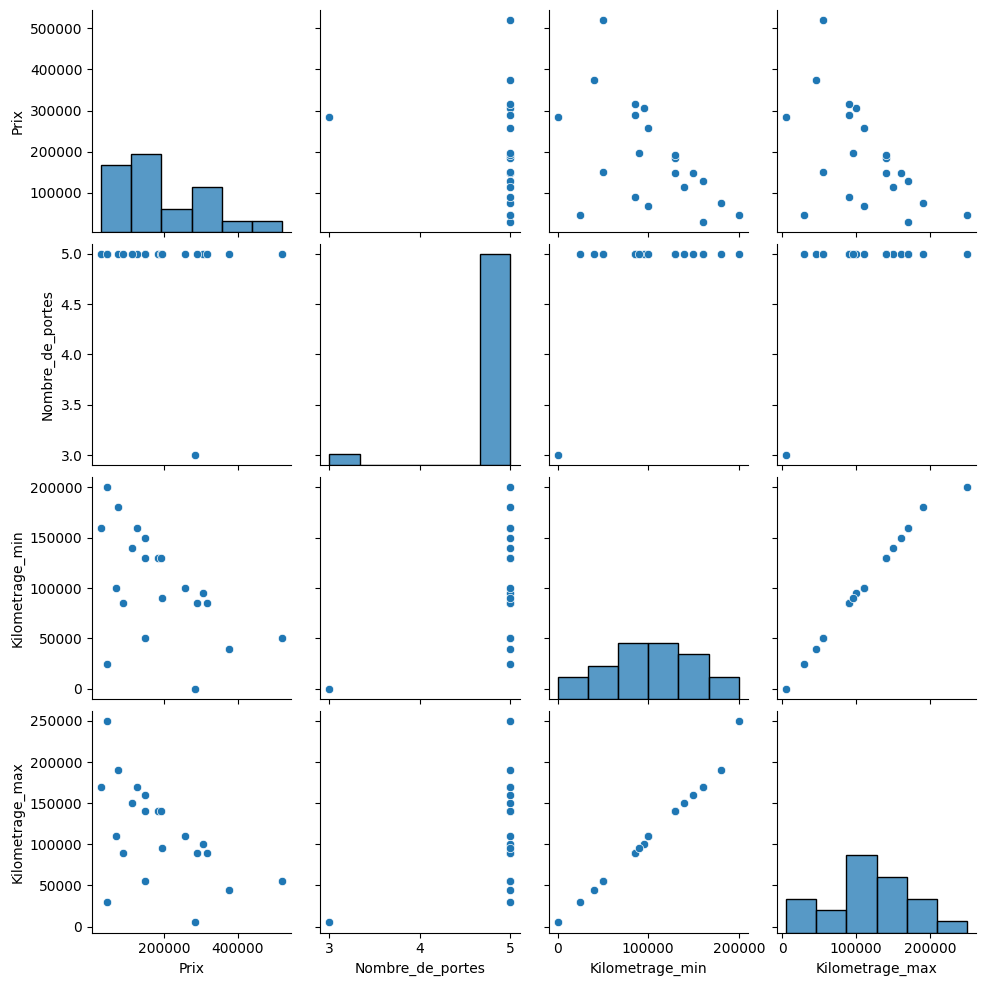

In [66]:
sns.pairplot(df)
plt.show()

In [67]:
pip install nbformat>=4.2.0

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [68]:
fig=px.histogram(df,
                 x='Prix',
                 hover_data=df.columns,
                 title='Distribution des prix')
fig.show()

In [69]:
fig=px.histogram(df,
                 x='Titre',
                 hover_data=df.columns,
                 title='Distribution des titres')
fig.show()

In [70]:
fig=px.histogram(df,
                 x='Model',
                 hover_data=df.columns,
                 title='Distribution des modeles')
fig.show()

In [71]:
fig=px.histogram(df,
                 x='Marque',
                 hover_data=df.columns,
                 title='Distribution des marques')
fig.show()

In [72]:
fig=px.histogram(df,
                 x='Etat',
                 hover_data=df.columns,
                 title='Distribution des etats')
fig.show()

In [73]:
# Regrouper par Etat et calculer la nombre de la prices
df_grouped = df.groupby('Etat').agg({'Prix': 'count'})
df_grouped

,Prix
Etat,
Bon,1
Excellent,11
Neuf,1
Très bon,8


In [74]:
df_grouped=df_grouped.reset_index()
df_grouped

,Etat,Prix
0,Bon,1
1,Excellent,11
2,Neuf,1
3,Très bon,8


In [75]:
df_grouped=df_grouped.rename(columns={'Prix':'count'})

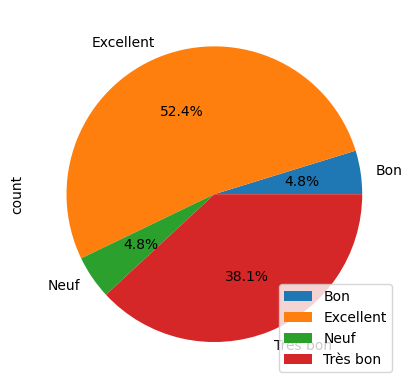

In [76]:
# le graphique circulaire
df_grouped.plot.pie(y='count', autopct='%1.1f%%', labels=df_grouped.Etat)
plt.show()

In [78]:
fig=px.histogram(df, 
                 x="Prix",
                 color="Origine",
                 hover_data=df.columns,
                 title="la distribution des prix en fonction d origine",
                 barmode="group")
fig.show()

In [79]:
fig=px.histogram(df,
                 x='Prix',
                 color='Marque',
                 hover_data=df.columns,
                 title='la distribution des prix en fonction de marque ',
                 barmode='group')
fig.show()

In [80]:
df

,Prix,Titre,Model,Marque,Etat,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
0,128000.0,ford focus,focus,ford,Très bon,5.0,WW au Maroc,160000.0,169999.0
2,305000.0,hyundai tucson 1.6l automatique,tucson,hyundai,Excellent,5.0,WW au Maroc,95000.0,99999.0
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,logan,dacia,Très bon,5.0,WW au Maroc,140000.0,149999.0
4,316000.0,skoda oct1via,octavia,skoda,Très bon,5.0,WW au Maroc,85000.0,89999.0
5,185000.0,santafe 2015,santa fe,hyundai,Excellent,5.0,WW au Maroc,130000.0,139999.0
6,45000.0,honda jazz2004,jazz,honda,Très bon,5.0,WW au Maroc,200000.0,249999.0
7,75000.0,peugeot 207 diesel,207,peugeot,Excellent,5.0,WW au Maroc,180000.0,189999.0
8,192000.0,voiture en excellent état intérieur et extérieur,sportage,kia,Très bon,5.0,WW au Maroc,130000.0,139999.0
9,375000.0,kia sportage gt-line,sportage,kia,Excellent,5.0,WW au Maroc,40000.0,44999.0
10,520000.0,jeep wrangler 2022,m151 mutt,jeep,Excellent,5.0,Dédouanée,50000.0,54999.0


In [81]:
df.isna().sum()

Prix                0
Titre               0
Model               0
Marque              0
Etat                0
Nombre_de_portes    1
Origine             2
Kilometrage_min     0
Kilometrage_max     0
dtype: int64

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 0 to 23
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Prix              21 non-null     float64
 1   Titre             21 non-null     object 
 2   Model             21 non-null     object 
 3   Marque            21 non-null     object 
 4   Etat              21 non-null     object 
 5   Nombre_de_portes  20 non-null     float64
 6   Origine           19 non-null     object 
 7   Kilometrage_min   21 non-null     float64
 8   Kilometrage_max   21 non-null     float64
dtypes: float64(4), object(5)
memory usage: 1.6+ KB


In [88]:
df['Nombre_de_portes'] = df['Nombre_de_portes'].fillna(df['Nombre_de_portes'].mean())

In [89]:
df['Origine'] = df['Origine'].fillna('Inconnue')

In [104]:

df = df[df['Model'] != 'focus']
df = df[df['Marque'] != 'ford']
df

,Prix,Titre,Model,Marque,Etat,Nombre_de_portes,Origine,Kilometrage_min,Kilometrage_max
2,305000.0,hyundai tucson 1.6l automatique,tucson,hyundai,Excellent,5.0,WW au Maroc,95000.0,99999.0
3,113000.0,dacia logan diesel manuelle 2018 à tétouan,logan,dacia,Très bon,5.0,WW au Maroc,140000.0,149999.0
4,316000.0,skoda oct1via,octavia,skoda,Très bon,5.0,WW au Maroc,85000.0,89999.0
5,185000.0,santafe 2015,santa fe,hyundai,Excellent,5.0,WW au Maroc,130000.0,139999.0
6,45000.0,honda jazz2004,jazz,honda,Très bon,5.0,WW au Maroc,200000.0,249999.0
7,75000.0,peugeot 207 diesel,207,peugeot,Excellent,5.0,WW au Maroc,180000.0,189999.0
8,192000.0,voiture en excellent état intérieur et extérieur,sportage,kia,Très bon,5.0,WW au Maroc,130000.0,139999.0
9,375000.0,kia sportage gt-line,sportage,kia,Excellent,5.0,WW au Maroc,40000.0,44999.0
10,520000.0,jeep wrangler 2022,m151 mutt,jeep,Excellent,5.0,Dédouanée,50000.0,54999.0
13,69000.0,fiat 500 modil 2009 mazot,500,fiat,Très bon,4.9,Inconnue,100000.0,109999.0


In [105]:
encoded_df = pd.get_dummies(df,columns=['Titre','Model','Marque','Etat','Origine'])
encoded_df

,Prix,Nombre_de_portes,Kilometrage_min,Kilometrage_max,Titre_citroen xsara 2004,Titre_dacia duster 2×4 manuel,Titre_dacia logan diesel manuelle 2018 à tétouan,Titre_fiat 500 modil 2009 mazot,Titre_honda jazz2004,Titre_hyundai tucson 1.6l automatique,...,Marque_toyota,Marque_volkswagen,Etat_Bon,Etat_Excellent,Etat_Neuf,Etat_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_Inconnue,Origine_WW au Maroc
2,305000.0,5.0,95000.0,99999.0,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,113000.0,5.0,140000.0,149999.0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,316000.0,5.0,85000.0,89999.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
5,185000.0,5.0,130000.0,139999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
6,45000.0,5.0,200000.0,249999.0,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
7,75000.0,5.0,180000.0,189999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8,192000.0,5.0,130000.0,139999.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
9,375000.0,5.0,40000.0,44999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
10,520000.0,5.0,50000.0,54999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
13,69000.0,4.9,100000.0,109999.0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [106]:
encoded_df.shape


(18, 59)

In [107]:
print(encoded_df.dtypes)

Prix                                                        float64
Nombre_de_portes                                            float64
Kilometrage_min                                             float64
Kilometrage_max                                             float64
Titre_citroen xsara 2004                                       bool
Titre_dacia duster 2×4 manuel                                  bool
Titre_dacia logan diesel manuelle 2018 à tétouan               bool
Titre_fiat 500 modil 2009 mazot                                bool
Titre_honda jazz2004                                           bool
Titre_hyundai tucson 1.6l automatique                          bool
Titre_jeep wrangler 2022                                       bool
Titre_kia sportage gt-line                                     bool
Titre_opel astra automatique 2017                              bool
Titre_opel corsa gs line diesel                                bool
Titre_peugeot 207 diesel                        

In [108]:
encoded_df.corr()

,Prix,Nombre_de_portes,Kilometrage_min,Kilometrage_max,Titre_citroen xsara 2004,Titre_dacia duster 2×4 manuel,Titre_dacia logan diesel manuelle 2018 à tétouan,Titre_fiat 500 modil 2009 mazot,Titre_honda jazz2004,Titre_hyundai tucson 1.6l automatique,...,Marque_toyota,Marque_volkswagen,Etat_Bon,Etat_Excellent,Etat_Neuf,Etat_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_Inconnue,Origine_WW au Maroc
Prix,1.000000,-0.160584,-0.550886,-0.559056,-0.280654,-0.086355,-0.152379,-0.235380,-0.280654,0.209809,...,0.181513,-0.308949,-0.308949,0.395854,0.172081,-0.350761,0.615384,0.172081,-0.039262,-0.404193
Nombre_de_portes,-0.160584,1.000000,0.464744,0.432235,0.061869,0.061869,0.061869,0.008838,0.061869,0.061869,...,0.061869,0.061869,0.061869,0.285204,-0.998749,0.154610,0.061869,-0.998749,0.051537,0.477238
Kilometrage_min,-0.550886,0.464744,1.000000,0.991172,-0.350109,0.216614,0.171276,-0.010075,0.443304,-0.032744,...,-0.078082,0.261952,0.261952,-0.046444,-0.463454,0.146868,-0.236765,-0.463454,-0.064255,0.434374
Kilometrage_max,-0.559056,0.432235,0.991172,1.000000,-0.330332,0.193720,0.153409,-0.007838,0.556526,-0.048150,...,-0.088462,0.234032,0.234032,-0.091882,-0.431112,0.192615,-0.229553,-0.431112,-0.070190,0.417067
Titre_citroen xsara 2004,-0.280654,0.061869,-0.350109,-0.330332,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,...,-0.058824,-0.058824,-0.058824,-0.271163,-0.058824,0.342997,-0.058824,-0.058824,-0.085749,0.129641
Titre_dacia duster 2×4 manuel,-0.086355,0.061869,0.216614,0.193720,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,-0.058824,...,-0.058824,-0.058824,-0.058824,0.216930,-0.058824,-0.171499,-0.058824,-0.058824,-0.085749,0.129641
Titre_dacia logan diesel manuelle 2018 à tétouan,-0.152379,0.061869,0.171276,0.153409,-0.058824,-0.058824,1.000000,-0.058824,-0.058824,-0.058824,...,-0.058824,-0.058824,-0.058824,-0.271163,-0.058824,0.342997,-0.058824,-0.058824,-0.085749,0.129641
Titre_fiat 500 modil 2009 mazot,-0.235380,0.008838,-0.010075,-0.007838,-0.058824,-0.058824,-0.058824,1.000000,-0.058824,-0.058824,...,-0.058824,-0.058824,-0.058824,-0.271163,-0.058824,0.342997,-0.058824,-0.058824,0.685994,-0.453743
Titre_honda jazz2004,-0.280654,0.061869,0.443304,0.556526,-0.058824,-0.058824,-0.058824,-0.058824,1.000000,-0.058824,...,-0.058824,-0.058824,-0.058824,-0.271163,-0.058824,0.342997,-0.058824,-0.058824,-0.085749,0.129641
Titre_hyundai tucson 1.6l automatique,0.209809,0.061869,-0.032744,-0.048150,-0.058824,-0.058824,-0.058824,-0.058824,-0.058824,1.000000,...,-0.058824,-0.058824,-0.058824,0.216930,-0.058824,-0.171499,-0.058824,-0.058824,-0.085749,0.129641


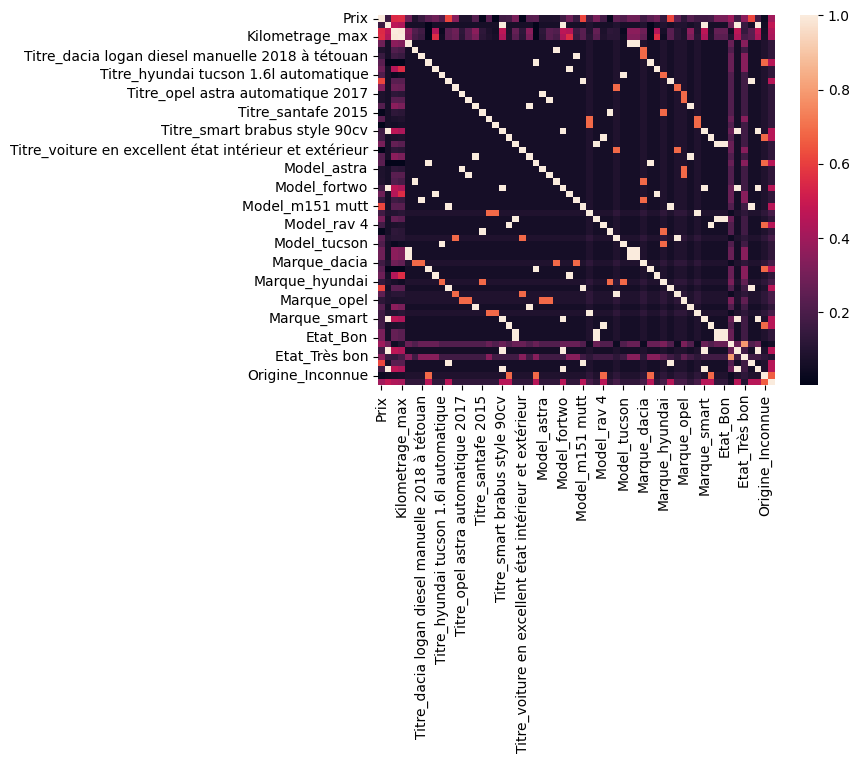

In [109]:

import seaborn as sns
sns.heatmap(encoded_df.corr().abs())
plt.show()

In [111]:
encoded_df

,Prix,Nombre_de_portes,Kilometrage_min,Kilometrage_max,Titre_citroen xsara 2004,Titre_dacia duster 2×4 manuel,Titre_dacia logan diesel manuelle 2018 à tétouan,Titre_fiat 500 modil 2009 mazot,Titre_honda jazz2004,Titre_hyundai tucson 1.6l automatique,...,Marque_toyota,Marque_volkswagen,Etat_Bon,Etat_Excellent,Etat_Neuf,Etat_Très bon,Origine_Dédouanée,Origine_Importée neuve,Origine_Inconnue,Origine_WW au Maroc
2,305000.0,5.0,95000.0,99999.0,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
3,113000.0,5.0,140000.0,149999.0,False,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,True
4,316000.0,5.0,85000.0,89999.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
5,185000.0,5.0,130000.0,139999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
6,45000.0,5.0,200000.0,249999.0,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
7,75000.0,5.0,180000.0,189999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
8,192000.0,5.0,130000.0,139999.0,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,True
9,375000.0,5.0,40000.0,44999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
10,520000.0,5.0,50000.0,54999.0,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
13,69000.0,4.9,100000.0,109999.0,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


MACHINE LEARNING

In [112]:

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor

In [113]:

# Split the dataset into features (X) and target (y)
X = encoded_df.iloc[:, :-1].values
y = encoded_df.Prix.values

In [114]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)



LinearRegression

In [116]:

# Create the linear regression model
model = LinearRegression()

# Train the model on the training set
model.fit(x_train, y_train)

LinearRegression


sklearn.linear_model._base.LinearRegression

In [117]:

# Make predictions on the testing set
predictions = model.predict(x_test)

In [118]:
lescore = r2_score(predictions, y_test)
print('Le score r^2 pour la  Regression Linéaire est {}'.format(lescore))

Le score r^2 pour la  Regression Linéaire est 1.0


In [119]:
# Create a DataFrame from y_test and predictions
results = pd.concat([pd.Series(y_test), pd.Series(predictions)], axis=1)
results.columns = ['y_test', 'predictions']

In [120]:
results

,y_test,predictions
0,113000.0,113000.000000
1,192000.0,192000.000001
2,520000.0,519999.999993
3,149000.0,149000.000000


C:\Users\HP ProBook 440 G8\AppData\Local\Temp\ipykernel_4332\1471412303.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP ProBook 440 G8\AppData\Local\Temp\ipykernel_4332\1471412303.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




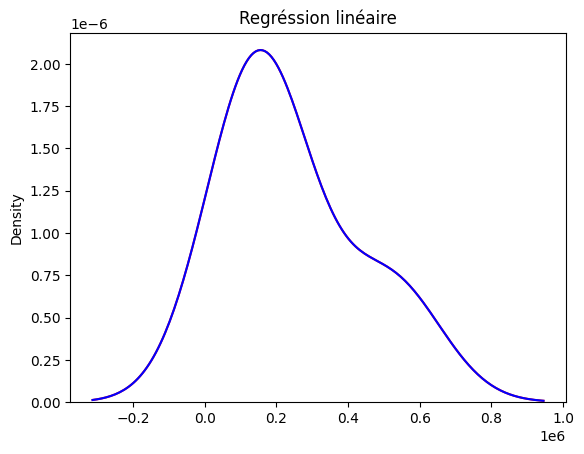

In [121]:
sns.distplot(predictions, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("Regréssion linéaire")
plt.show()

RandomForestRegressor

In [174]:
# Modèle avec plus d'arbres et une profondeur ajustée
model = RandomForestRegressor(n_estimators=200, max_depth=30, random_state=42, min_samples_split=5, min_samples_leaf=3)
model.fit(x_train, y_train)

# Faire des prédictions
predictions = model.predict(x_test)

# Calculer les erreurs
mse = mean_squared_error(y_test, predictions)
print("Mean squared error:", mse)

# Calculer le score R²
lescoreRFR = r2_score(y_test, predictions)
print('Le score r^2 pour la  Random Forest Regressor : {}'.format(lescoreRFR))


Mean squared error: 12546621604.128319
Le score r^2 pour la  Random Forest Regressor : 0.5223291636937775


In [172]:
# Create a DataFrame from y_test and predictions
results = pd.concat([pd.Series(y_test), pd.Series(predictions)], axis=1)
results.columns = ['y_test', 'predictions']
results

,y_test,predictions
0,113000.0,109375.521525
1,192000.0,183148.686508
2,520000.0,296125.370370
3,149000.0,128128.212001


C:\Users\HP ProBook 440 G8\AppData\Local\Temp\ipykernel_4332\1893339070.py:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\HP ProBook 440 G8\AppData\Local\Temp\ipykernel_4332\1893339070.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




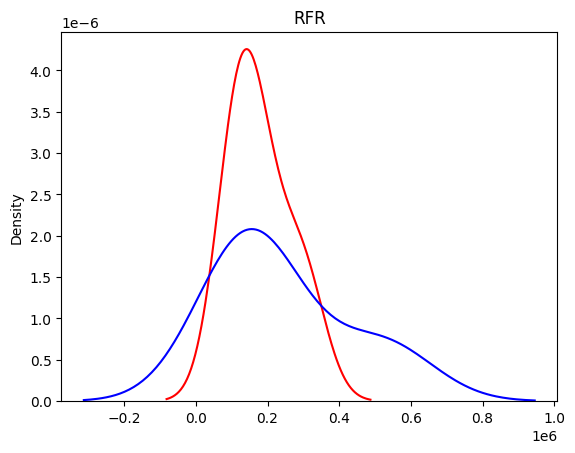

In [173]:
sns.distplot(predictions, hist=False, color='r', label='predit')
sns.distplot(y_test, hist=False, color='b', label='prix actuel')
plt.title("RFR")
plt.show()